# Importing Header, SoilPrep, and PlotFunctions

In [6]:
import import_ipynb 
from Header import *

import import_ipynb
from SoilPrep import *

In [7]:
import import_ipynb
from PlotFunctions import *

In [8]:
import import_ipynb
from HyperMainSentinelNew import *

## Loading  Mtree 

In [9]:
with open ('HMtreeSenNew.pickle', 'rb') as file:
    HMtreeSenNew = pickle.load(file)

 #  Best Models for Sand, Silt, Clay, TOC, and CaCO3..

In [10]:
feature_scores = {}

model_details ={}

In [12]:
#HMtreeSenNew['plsr']['Silt']['none']['fod2']

##  Sand Models

### Cubist

Sand -> [ r2 - **0.52**, Spec - fod2, n_bands -10]     <br/><br/>
***Description***: To obtain the best model for sand using cubist method we trained the model on the first order derivative of the smoothed spectra resampled to the 10 bands provided by Sentinel.

In [13]:
sand_model_cubist = Cubist(n_committees = 15, n_rules = 10) 
sand_model_cubist.fit(fod_sampled10,  T[0])

Cubist(n_committees=15, n_rules=10)

In [14]:
feature_scores['Sand'] = permutation_importance(sand_model_cubist, fod_sampled10, T[0], n_repeats=20, random_state=0)

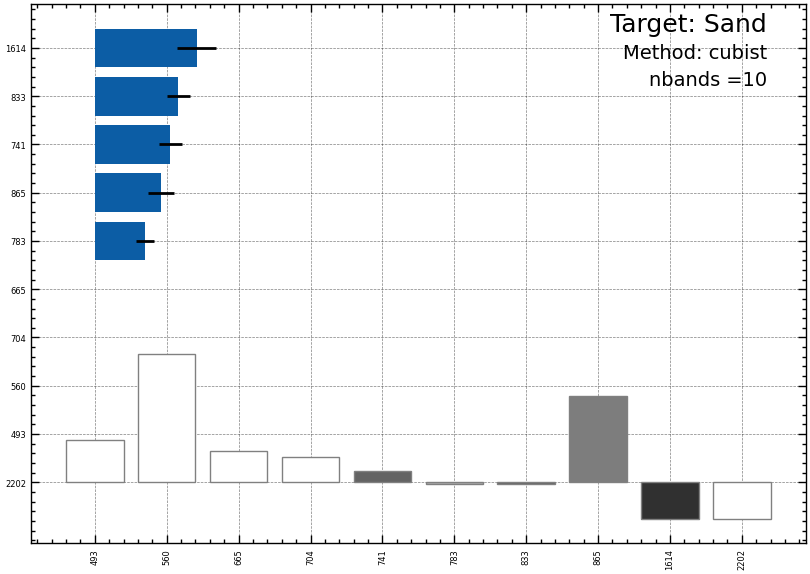

In [15]:
model_details['Sand'] = {'method': 'cubist', 'spec': fod_sampled10, 'spec_proc': 'fod2', 'n_bands': 10}
show_important_features_for ('Sand', model_details, feature_scores, 3, 20, 2)

Sand -> [ r2 - **0.5**, Spec - fod2, n_bands -10]     <br/><br/>
***Description***: To obtain the best model for sand using plsr method we trained the model on the first order derivative of the smoothed spectra resampled to the 10 bands provided by Sentinel.

In [16]:
sand_model_plsr = PLSRegression(n_components=4, scale=True) 
sand_model_plsr.fit(fod_sampled10,  T[0])

PLSRegression(n_components=4)

In [17]:
feature_scores['Sand'] = permutation_importance(sand_model_plsr, fod_sampled10, T[0], n_repeats=20, random_state=0)

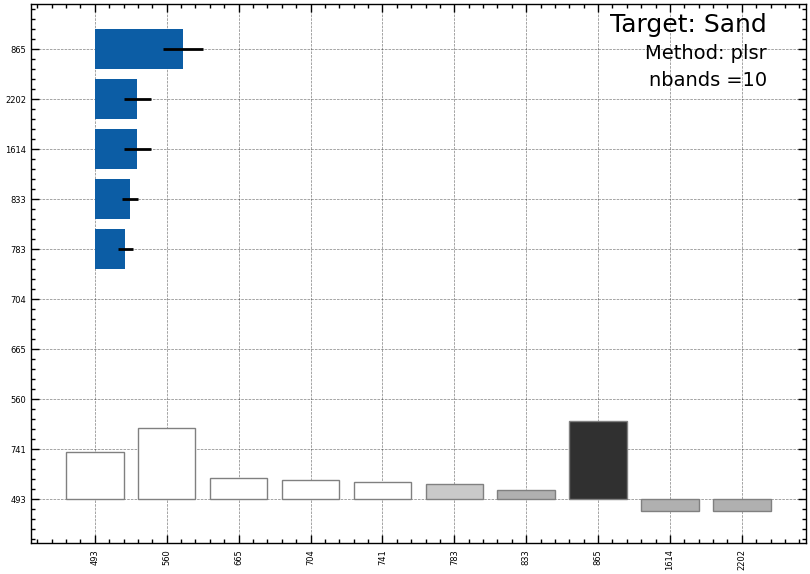

In [18]:
model_details['Sand'] = {'method': 'plsr', 'spec': fod_sampled10, 'spec_proc': 'fod2', 'n_bands': 10}
show_important_features_for ('Sand', model_details, feature_scores, 4, 20, 20)

##  Silt 

### PLSR

Silt -> [ r2 - **0.32**, Spec - fod2, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for silt using plsr method we trained the model on the
 first order derivative of the smoothed spectra resampled to the 10 bands provided by Sentinel.


In [19]:
silt_model_plsr = PLSRegression(n_components=4, scale=True)  
silt_model_plsr.fit(fod_sampled10,  T[1])

PLSRegression(n_components=4)

In [20]:
feature_scores['Silt'] = permutation_importance(silt_model_plsr, fod_sampled10, T[1], n_repeats=20, random_state=0)

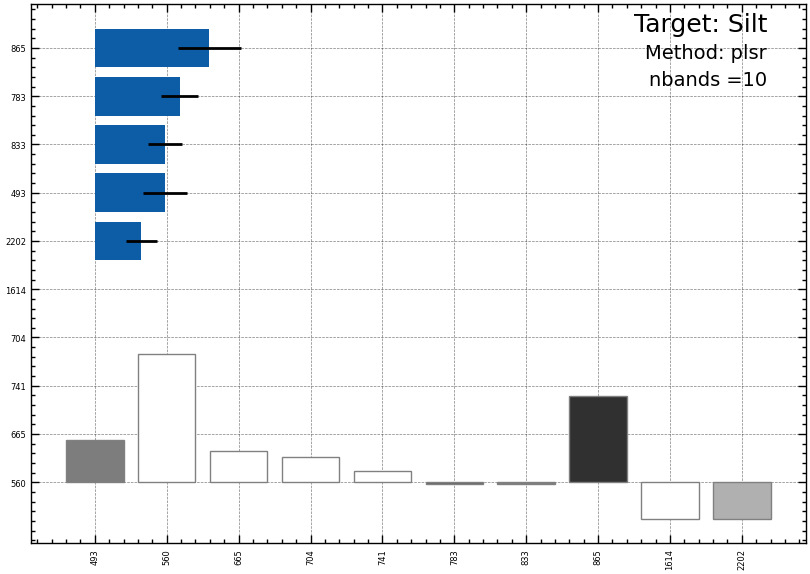

In [21]:
model_details['Silt'] = {'method': 'plsr', 'spec': fod_sampled10, 'spec_proc': 'fod2', 'n_bands': 10}
show_important_features_for ('Silt', model_details, feature_scores, 6, 20, 2)

### Gradient Boosting Regression Tree

Silt -> [ r2 - **0.41**, Spec - fod2, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for silt using gbrt method we trained the model on the first order derivative of the smoothed spectra resampled to the 10 bands provided by Sentinel.


In [22]:
silt_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)  
silt_model_gbrt.fit(fod_sampled10,  T[1])

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [23]:
feature_scores['Silt'] = permutation_importance(silt_model_gbrt, fod_sampled10, T[1], n_repeats=20, random_state=0)

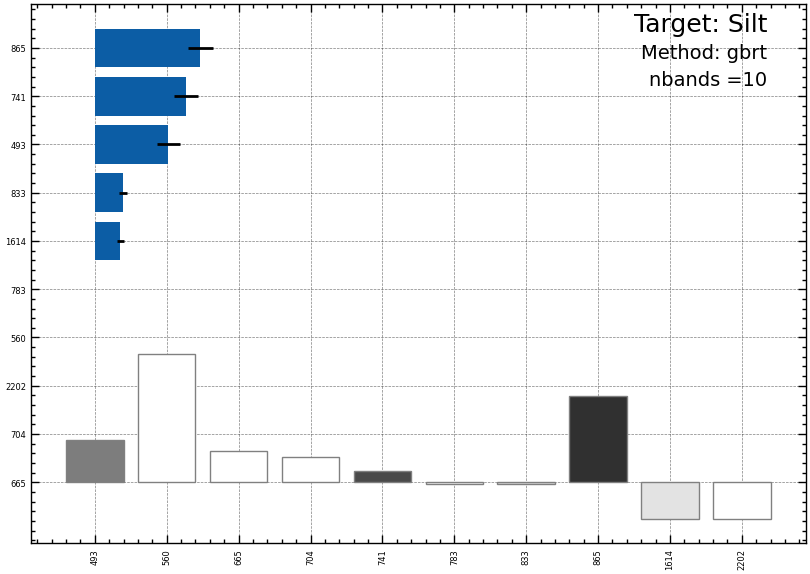

In [24]:
model_details['Silt'] = {'method': 'gbrt', 'spec': fod_sampled10, 'spec_proc': 'fod2', 'n_bands': 10}
show_important_features_for ('Silt', model_details, feature_scores, 5, 20, 2)

## Clay 

### PLSR

Clay -> [ r2 - **0.61**, Spec - log, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for clay using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra and resampled it to the 10 bands provided by Sentinel.


In [25]:
clay_model_plsr = PLSRegression(n_components=4, scale=True)  
clay_model_plsr.fit(sampled_log10,  T[2])

PLSRegression(n_components=4)

In [26]:
feature_scores['Clay'] = permutation_importance(clay_model_plsr, sampled_log10, T[2], n_repeats=20, random_state=0)

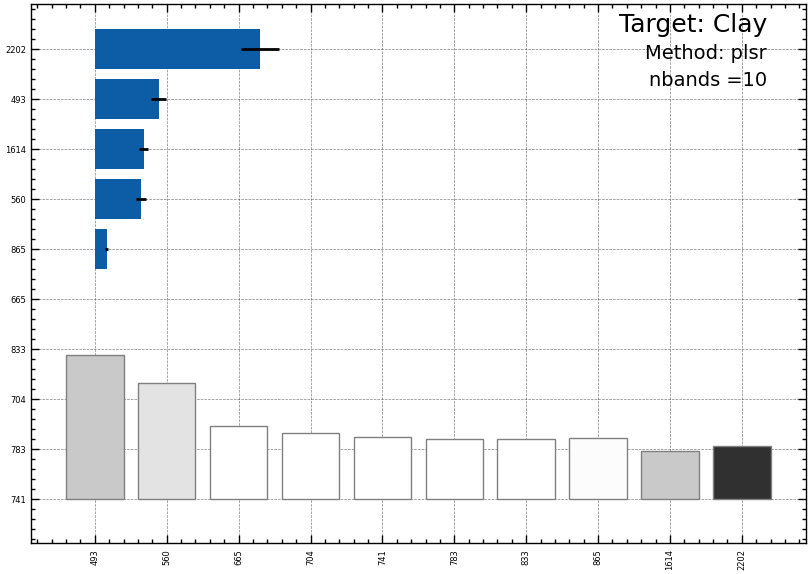

In [27]:
model_details['Clay'] = {'method': 'plsr', 'spec': sampled_log10, 'spec_proc': 'log', 'n_bands': 10}
show_important_features_for ('Clay', model_details, feature_scores, 0.2, 1, 2)

### Kernel Ridge

Clay -> [ r2 - **0.58**, Spec - log, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for clay using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse of the spectra and resampled it to the 10 bands provided by Sentinel.


In [28]:
clay_model_kernelridge = KernelRidge(alpha = 0.001) 
clay_model_kernelridge.fit(sampled_log10,  T[2])

KernelRidge(alpha=0.001)

In [29]:
feature_scores['Clay'] = permutation_importance(clay_model_kernelridge, sampled_log10, T[2], n_repeats=20, random_state=0)

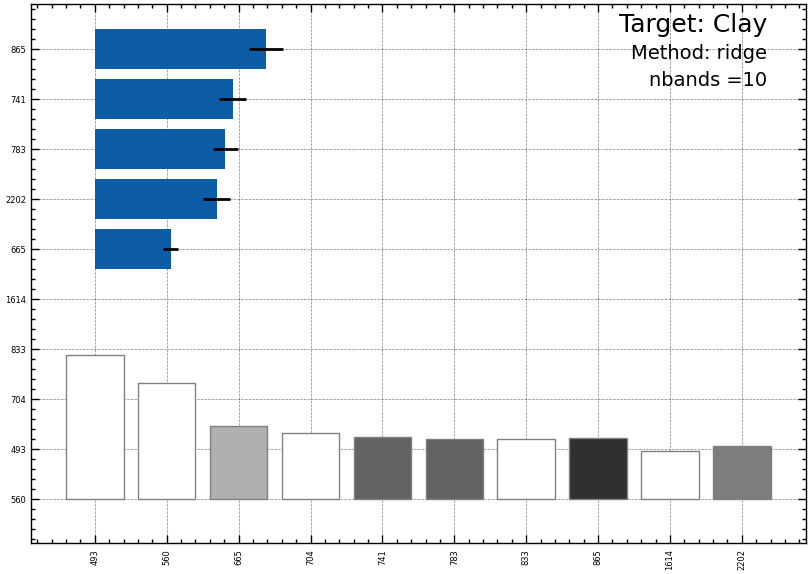

In [30]:
model_details['Clay'] = {'method': 'ridge', 'spec': sampled_log10, 'spec_proc': 'log', 'n_bands': 10}
show_important_features_for ('Clay', model_details, feature_scores, 0.05, 1, 2)

## TOC

### Cubist

TOC -> [ r2 - **0.41**, Spec - log, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for TOC using cubist method we trained the model on the logarithmic of the reflectance inverse of the spectra and is resampled to the 10 bands provided by Sentinel.


In [31]:
TOC_model_cubist = Cubist(n_committees = 10, n_rules = 10)
TOC_model_cubist.fit(sampled_log10,  T[3])

Cubist(n_committees=10, n_rules=10)

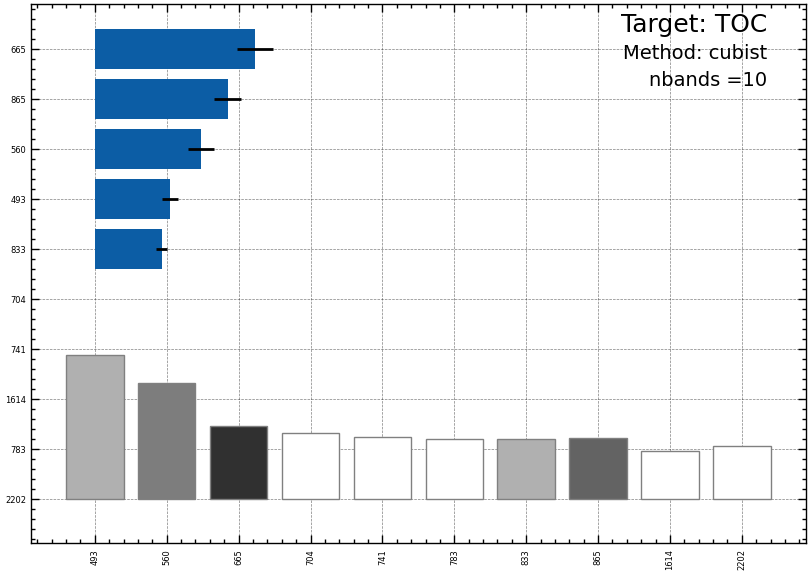

In [32]:
feature_scores['TOC'] = permutation_importance(TOC_model_cubist, sampled_log10, T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'cubist', 'spec': sampled_log10, 'spec_proc': 'log', 'n_bands': 10}
show_important_features_for ('TOC', model_details, feature_scores, 2, 1, 2)

### Gradient Boosting Regression Tree

TOC -> [ r2 - **0.49**, Spec - cr, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for TOC using gbrt method we trained the model on the continuum removal of the smoothed spectra and it is resampled to the 10 bands provided by Sentinel.


In [33]:
TOC_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 4, n_estimators = 30, random_state = 42)
TOC_model_gbrt.fit(sampled_cr10,  T[3])

GradientBoostingRegressor(max_depth=4, n_estimators=30, random_state=42)

In [34]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, sampled_cr10, T[3], n_repeats=20, random_state=0)

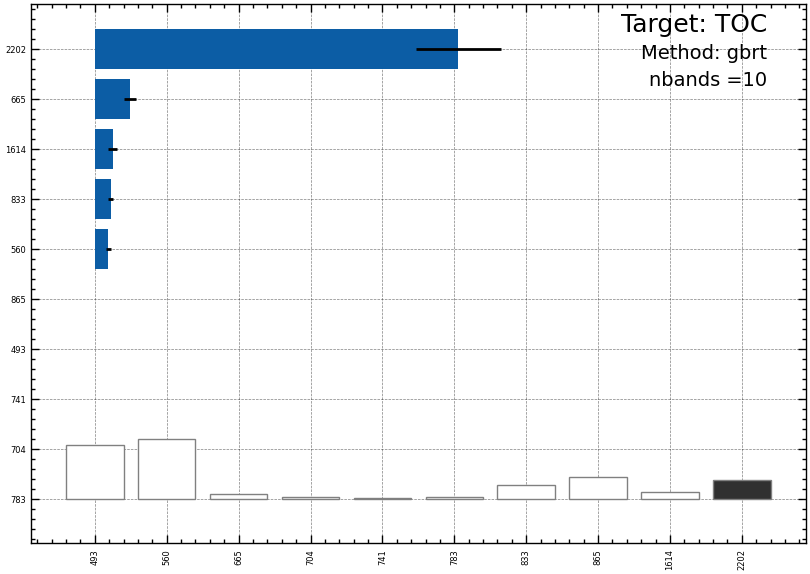

In [35]:
model_details['TOC'] = {'method': 'gbrt', 'spec': sampled_cr10, 'spec_proc': 'cr', 'n_bands': 10}
show_important_features_for ('TOC', model_details, feature_scores, 4, 20, 2)

## CaCO3

In [47]:
HMtreeSenNew['cubist']['CaCO3']['none']['fod2']

{'bp': {'n_committees': 15, 'n_rules': 10},
 'X_test':          493       560       665       704       741       783       833  \
 76  0.092232  0.103406  0.028157  0.023571  0.019460  0.012313  0.006098   
 0   0.049058  0.096656  0.028886  0.025786  0.020817  0.013582  0.007529   
 71  0.086641  0.100433  0.028638  0.024143  0.020397  0.013197  0.006692   
 23  0.029648  0.050024  0.016800  0.015429  0.014238  0.012487  0.007146   
 12  0.067791  0.094045  0.026367  0.023286  0.020159  0.015354  0.008502   
 57  0.150195  0.130608  0.035249  0.026286  0.016875  0.004678  0.000769   
 10  0.139684  0.132174  0.034654  0.028637  0.023852  0.013907  0.006707   
 19  0.047998  0.065271  0.026044  0.022986  0.022804  0.022374  0.013425   
 4   0.051135  0.071463  0.015638  0.013071  0.006246 -0.002937 -0.002652   
 68  0.147134  0.137698  0.031841  0.024224  0.014960  0.002803 -0.000143   
 62  0.033641  0.051815  0.022151  0.021350  0.023705  0.026805  0.016804   
 65  0.036477  0.04526

### PLSR

CaCO3 -> [ r2 - **0.63**, Spec - none, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using plsr method we trained the model on the smoothed spectra which is resampled to the 10 bands provided by Sentinel.


In [37]:
CaCO3_model_plsr = PLSRegression(n_components=9, scale=True)
CaCO3_model_plsr.fit(sampled_spec10,  T[4])

PLSRegression(n_components=9)

In [38]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_plsr, sampled_spec10, T[4], n_repeats=20, random_state=0)
model_details['CaCO3'] = {'method': 'plsr', 'spec': sampled_spec10, 'spec_proc': 'none', 'n_bands': 10}

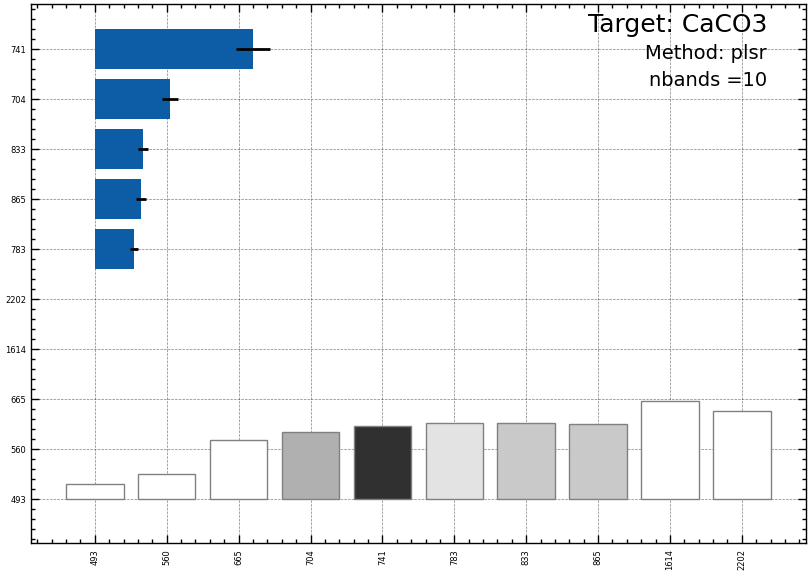

In [46]:
show_important_features_for ('CaCO3', model_details, feature_scores, 0.00005, 5, 2)

### Cubist

CaCO3 -> [ r2 - **0.63**, Spec - fod2, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using cubist method we trained the model on the first order derivative of the smoothed spectra which was resampled to the 10 bands provided by Sentinel.


In [48]:
CaCO3_model_cubist =Cubist(n_committees = 15, n_rules = 10)
CaCO3_model_cubist.fit(fod_sampled10,  T[4])

Cubist(n_committees=15, n_rules=10)

In [49]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_cubist, fod_sampled10, T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'cubist', 'spec': fod_sampled10, 'spec_proc': 'fod2', 'n_bands': 10}

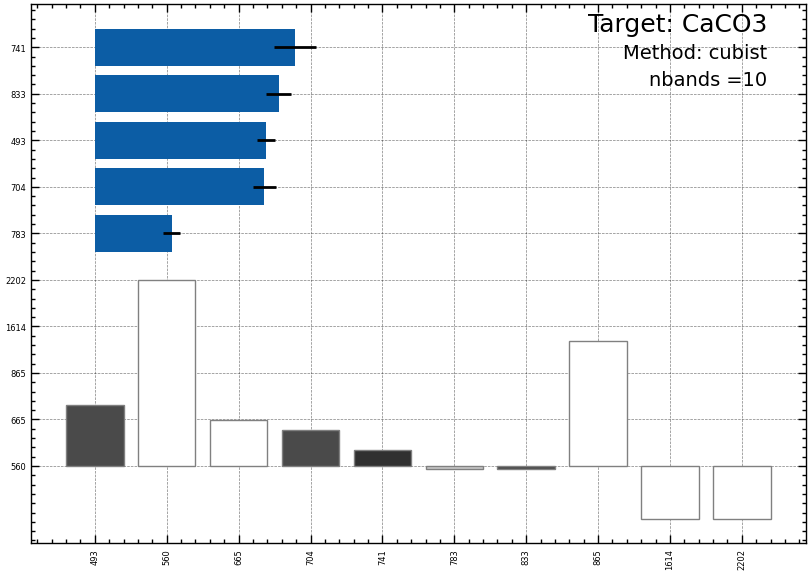

In [52]:
show_important_features_for ('CaCO3', model_details, feature_scores, 2, 30, 2)